# Processing Deforestation Data
For this data, you will need to download the excel file from the Deforestation website:
https://www.globalforestwatch.org/dashboards/country/USA/?category=forest-change
At the top of the page in the black area next to "SHARE DASHBOARD", download the data with the download icon.
Put it in the Data folder and rename it to "Deforestation.xlsx"

Run this code to create eighteen CSV files containing formatted information about forest loss in each US county, in a "Deforestation" folder that gets created within the Data directory.

The way this data works is that each county has eight entries in the dataset detailing different "thresholds" of forest coverage. The data was created using remote sensing, dividing the US into a very large grid of 30 meter by 30 meter squares. The thresholds detail which squares are included in the numbers by the percentage of forest coverage in each square; for example, the data point for Prince George's County, MD at threshold 50 details the forest loss for all of the squares within PG county that started with at least 50% forest coverage, but ignores squares in PG county with less initial forest coverage than that.

There are two CSV files (one that maintains the by-year distinction, and one that sums the forest loss across the years) saved for each threshold level: 0, 10, 15, 20, 25, 30, 50, 75. There are also two CSV files saved with all thresholds included.

The data is divided into counties, and further divided into forest loss by year. There is also a metric indicating the percentage of the forest loss based on the total forest area in each county. 

In [72]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt

current_dir = os.getcwd()

In [73]:
df = pd.read_excel(os.path.join(current_dir, "..", "Data", "Deforestation.xlsx"), sheet_name="Subnational 2 tree cover loss")
# df = df[df["threshold"] == 0]
df = df.drop(["country"], axis=1).rename(columns={"subnational1": "STATE", "subnational2": "COUNTY"})
df.head(20)


,STATE,COUNTY,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
0,Alabama,Autauga,0,156174,156174,156174,9783,2848,1640,1321,...,1954,2361,2889,3285,2415,2373,1990,2366,1666,1757
1,Alabama,Autauga,10,156174,109666,103665,9783,2831,1634,1314,...,1711,1839,2177,2675,1786,1830,1481,1855,1337,1316
2,Alabama,Autauga,15,156174,108202,102662,9783,2830,1633,1314,...,1706,1826,2164,2655,1774,1815,1471,1841,1326,1302
3,Alabama,Autauga,20,156174,106621,100894,9783,2823,1631,1311,...,1692,1807,2140,2627,1755,1788,1453,1818,1305,1279
4,Alabama,Autauga,25,156174,105337,100504,9783,2819,1630,1310,...,1685,1792,2122,2609,1742,1771,1438,1800,1291,1263
5,Alabama,Autauga,30,156174,103485,96833,9783,2810,1628,1306,...,1669,1774,2098,2575,1724,1739,1414,1772,1272,1240
6,Alabama,Autauga,50,156174,97757,89257,9783,2744,1613,1284,...,1590,1697,1998,2434,1653,1634,1341,1662,1211,1152
7,Alabama,Autauga,75,156174,87369,76245,9783,2517,1530,1163,...,1476,1564,1809,2244,1506,1478,1223,1487,1099,1028
8,Alabama,Baldwin,0,424355,424355,424355,23735,4392,3468,3245,...,6524,5829,7101,6268,6205,4685,6495,4671,4118,3012
9,Alabama,Baldwin,10,424355,292209,280999,23735,4368,3452,3228,...,5355,4660,5687,4652,4845,3547,4679,3232,2745,2317


In [74]:
loss_over_time = df.copy()
loss_over_time = loss_over_time.drop("gain_2000-2020_ha", axis=1)

loss_over_time = loss_over_time.melt(id_vars=["STATE", "COUNTY", "area_ha", "threshold", "extent_2000_ha", "extent_2010_ha"], var_name="Year", value_name="HA_Loss")
loss_over_time["Year"] = loss_over_time["Year"].str[-4:]
loss_over_time

,STATE,COUNTY,area_ha,threshold,extent_2000_ha,extent_2010_ha,Year,HA_Loss
0,Alabama,Autauga,156174,0,156174,156174,2001,2848
1,Alabama,Autauga,156174,10,109666,103665,2001,2831
2,Alabama,Autauga,156174,15,108202,102662,2001,2830
3,Alabama,Autauga,156174,20,106621,100894,2001,2823
4,Alabama,Autauga,156174,25,105337,100504,2001,2819
...,...,...,...,...,...,...,...,...
579227,Wyoming,Weston,623139,20,30023,18994,2023,207
579228,Wyoming,Weston,623139,25,25585,17336,2023,148
579229,Wyoming,Weston,623139,30,23213,16177,2023,126
579230,Wyoming,Weston,623139,50,12607,3772,2023,27


In [75]:
loss_over_time["area_sqmi"] = loss_over_time["area_ha"] / 259.0
loss_over_time["percent_lost"] = loss_over_time["HA_Loss"] / loss_over_time["extent_2000_ha"]
loss_over_time.sort_values("percent_lost", ascending=False)[loss_over_time["extent_2000_ha"] >= 100].head(20)

C:\Users\calvi\AppData\Local\Temp\ipykernel_18968\637720346.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  loss_over_time.sort_values("percent_lost", ascending=False)[loss_over_time["extent_2000_ha"] >= 100].head(20)


,STATE,COUNTY,area_ha,threshold,extent_2000_ha,extent_2010_ha,Year,HA_Loss,area_sqmi,percent_lost
266343,New Mexico,Los Alamos,27946,75,1741,639,2011,1112,107.899614,0.638713
266342,New Mexico,Los Alamos,27946,50,2917,1565,2011,1575,107.899614,0.539938
272382,Texas,Coke,238893,50,1099,256,2011,509,922.366795,0.463148
266341,New Mexico,Los Alamos,27946,30,4420,3330,2011,1953,107.899614,0.441855
454150,Arizona,Pinal,1391158,50,1351,2491,2019,586,5371.266409,0.433753
454151,Arizona,Pinal,1391158,75,195,709,2019,80,5371.266409,0.410256
20907,Texas,Glasscock,234769,20,103,0,2001,42,906.444015,0.407767
266340,New Mexico,Los Alamos,27946,25,4909,3482,2011,1991,107.899614,0.405582
273109,Texas,Kent,231452,30,124,6,2011,50,893.637066,0.403226
20906,Texas,Glasscock,234769,15,109,1,2001,43,906.444015,0.394495


In [76]:
# Connecting FIPS codes
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'UScounties', 'UScounties.shp'))
counties

loss_over_time = loss_over_time.merge(counties, how="left", left_on=["STATE", "COUNTY"], right_on=["STATE_NAME", "NAME"])
loss_over_time = loss_over_time.drop(["STATE_NAME", "NAME", "geometry"], axis=1)
loss_over_time

,STATE,COUNTY,area_ha,threshold,extent_2000_ha,extent_2010_ha,Year,HA_Loss,area_sqmi,percent_lost,STATE_FIPS,CNTY_FIPS,FIPS
0,Alabama,Autauga,156174,0,156174,156174,2001,2848,602.988417,0.018236,01,001,01001
1,Alabama,Autauga,156174,10,109666,103665,2001,2831,602.988417,0.025815,01,001,01001
2,Alabama,Autauga,156174,15,108202,102662,2001,2830,602.988417,0.026155,01,001,01001
3,Alabama,Autauga,156174,20,106621,100894,2001,2823,602.988417,0.026477,01,001,01001
4,Alabama,Autauga,156174,25,105337,100504,2001,2819,602.988417,0.026762,01,001,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579227,Wyoming,Weston,623139,20,30023,18994,2023,207,2405.942085,0.006895,56,045,56045
579228,Wyoming,Weston,623139,25,25585,17336,2023,148,2405.942085,0.005785,56,045,56045
579229,Wyoming,Weston,623139,30,23213,16177,2023,126,2405.942085,0.005428,56,045,56045
579230,Wyoming,Weston,623139,50,12607,3772,2023,27,2405.942085,0.002142,56,045,56045


In [77]:
directory = os.path.join(current_dir, '..', 'Data', 'Deforestation')
if not os.path.exists(directory):
    os.makedirs(directory)

In [78]:
for num in loss_over_time["threshold"].unique():
    subset = loss_over_time[loss_over_time["threshold"] == num]
    subset.to_csv(os.path.join(directory, f'Annual_Forest_Loss_Threshold_{num}.csv'), index=False)

loss_over_time.to_csv(os.path.join(directory, f'Annual_Forest_Loss_ALL.csv'), index=False)

In [83]:
total_forest_loss = loss_over_time.groupby(["STATE", "COUNTY", "threshold", "area_ha", "extent_2000_ha", "extent_2010_ha", "area_sqmi", "STATE_FIPS", "CNTY_FIPS", "FIPS"]).agg("sum").reset_index()
total_forest_loss = total_forest_loss.drop(["Year"], axis=1)

for num in total_forest_loss["threshold"].unique():
    subset = total_forest_loss[total_forest_loss["threshold"] == num]
    subset.to_csv(os.path.join(directory, f'Total_Forest_Loss_Threshold_{num}.csv'), index=False)

total_forest_loss.to_csv(os.path.join(directory, f'Total_Forest_Loss_ALL.csv'), index=False)

In [84]:
total_forest_loss

,STATE,COUNTY,threshold,area_ha,extent_2000_ha,extent_2010_ha,area_sqmi,STATE_FIPS,CNTY_FIPS,FIPS,HA_Loss,percent_lost
0,Alabama,Autauga,0,156174,156174,156174,602.988417,01,001,01001,47535,0.304372
1,Alabama,Autauga,10,156174,109666,103665,602.988417,01,001,01001,41990,0.382890
2,Alabama,Autauga,15,156174,108202,102662,602.988417,01,001,01001,41848,0.386758
3,Alabama,Autauga,20,156174,106621,100894,602.988417,01,001,01001,41573,0.389914
4,Alabama,Autauga,25,156174,105337,100504,602.988417,01,001,01001,41399,0.393015
...,...,...,...,...,...,...,...,...,...,...,...,...
24771,Wyoming,Weston,20,623139,30023,18994,2405.942085,56,045,56045,9592,0.319488
24772,Wyoming,Weston,25,623139,25585,17336,2405.942085,56,045,56045,8516,0.332851
24773,Wyoming,Weston,30,623139,23213,16177,2405.942085,56,045,56045,7831,0.337354
24774,Wyoming,Weston,50,623139,12607,3772,2405.942085,56,045,56045,4697,0.372571


In [87]:
counties2 = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'Counties2', 'us_county.shp')).rename(columns={"GEOID": "FIPS"})
counties2.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,FIPS,NAME,LSAD,ALAND,AWATER,id,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,6.393875e+08,69473325.0,1,"POLYGON ((959182.740 -821711.187, 959268.612 -..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,7.504394e+08,4829777.0,2,"POLYGON ((1350485.716 -619831.406, 1350606.534..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1.103572e+09,13943044.0,3,"POLYGON ((1155226.654 -790469.014, 1155326.223..."
3,21,065,00516879,0500000US21065,21065,Estill,06,6.555099e+08,6516335.0,4,"POLYGON ((1390075.380 -684612.798, 1390215.039..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,9.027272e+08,7182793.0,5,"POLYGON ((1386431.679 -594472.514, 1386496.220..."


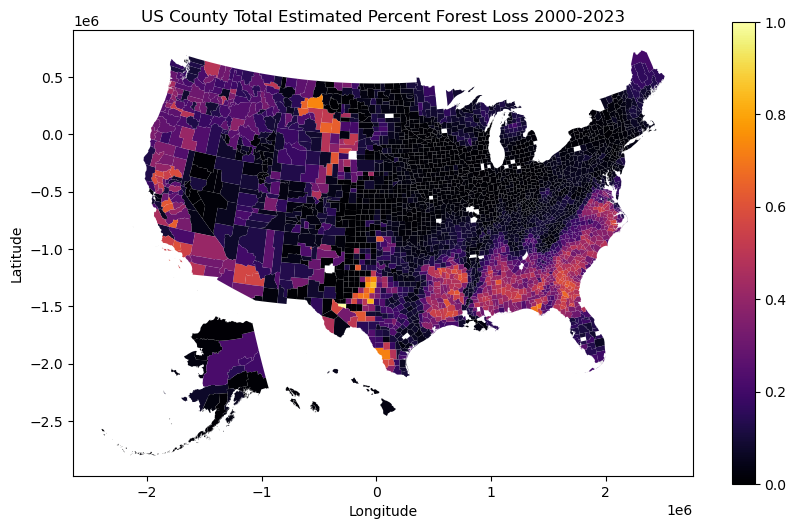

In [95]:
merged = counties2.merge(total_forest_loss[total_forest_loss["threshold"] == 50], how="inner", left_on="FIPS", right_on="FIPS")

column_to_plot = 'percent_lost'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column=column_to_plot, cmap='inferno', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True)
plt.title('US County Total Estimated Percent Forest Loss 2000-2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()